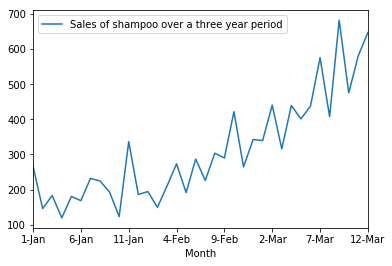

36
21
predicted=272.964516, expected=421.600000
predicted=290.313860, expected=264.500000
predicted=349.117727, expected=342.300000
predicted=306.512963, expected=339.700000
predicted=387.376377, expected=440.400000
predicted=348.154089, expected=315.900000
predicted=386.308835, expected=439.300000
predicted=356.082058, expected=401.300000
predicted=446.379475, expected=437.400000
predicted=394.737307, expected=575.500000
predicted=434.915527, expected=407.600000
predicted=507.923452, expected=682.000000
predicted=435.482937, expected=475.300000
predicted=652.743897, expected=581.300000
predicted=546.343560, expected=646.900000
Test MSE: 7547.805


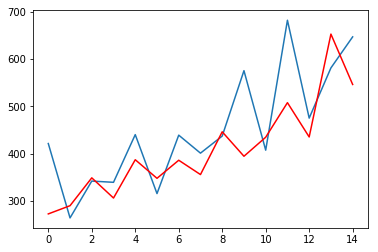

In [50]:
#students have to make ARIMA model over shampoo sales data and
#check the MSE between predicted and actual value.

import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
#input the csv file.
series = pd.read_csv('input/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=True, index_col='Month')
series.head()
series.plot()
pyplot.show()
X = series.values
X
size = int(len(X) * 0.60)
print(len(X))
print(size)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
